In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
emo_df = pd.read_csv('data/preprocessed/EmoSounds_preprocessed.csv')
iad_df = pd.read_csv('data/preprocessed/IADSED_preprocessed.csv')

In [3]:
"""
    Performs emotion mapping of all rows in the dataset into 4 classes.
    It will create a new categorical column called emotion_types.
"""
def emotion_mapping(df, center_val):
    emotion_map = [
        (df['arousal'] >= center_val) & (df['valence'] >= center_val), #Class 1 
        (df['arousal'] >= center_val) & (df['valence'] < center_val), #Class 2
        (df['arousal'] < center_val) & (df['valence'] < center_val), #Class 3
        (df['arousal'] < center_val) & (df['valence'] >= center_val) #Class 4   
    ]

    emotion_types = ["Positive Arousal, Positive Valence", "Positive Arousal, Negative Valence", "Negative Arousal, Negative Valence", "Negative Arousal, Positive Valence"]

    df["emotion_types"] = np.select(emotion_map, emotion_types, default="Unknown")

    return df

In [4]:
iad_df = emotion_mapping(iad_df, 5)
emo_df = emotion_mapping(emo_df, 0)

Check how many rows fall into each emotion type.

In [5]:
iad_df["emotion_types"].value_counts()

emotion_types
Positive Arousal, Negative Valence    482
Positive Arousal, Positive Valence    164
Negative Arousal, Positive Valence    151
Negative Arousal, Negative Valence    130
Name: count, dtype: int64

In [6]:
emo_df["emotion_types"].value_counts()

emotion_types
Positive Arousal, Negative Valence    232
Negative Arousal, Positive Valence    205
Negative Arousal, Negative Valence    101
Positive Arousal, Positive Valence     62
Name: count, dtype: int64

Visualization of all data in their respective classes for both datasets.

/var/folders/6t/2l3t8qh11cvffgq2kr230qhr0000gn/T/ipykernel_11408/225499011.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Visualization saved as 'emotion_mapping_visualization.png'


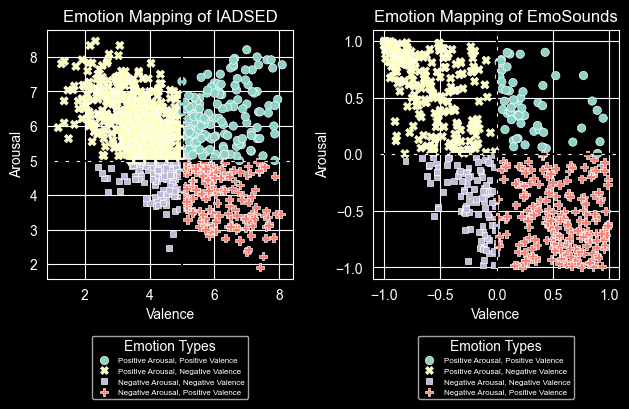

In [7]:
fig, axes = plt.subplots(1, 2, constrained_layout=True)

emotions = ["Positive Arousal, Positive Valence", "Positive Arousal, Negative Valence", "Negative Arousal, Negative Valence", "Negative Arousal, Positive Valence"]

sns.scatterplot(ax=axes[0], data=iad_df, x="valence", y="arousal", hue="emotion_types", hue_order=emotions, style="emotion_types", style_order=emotions)
axes[0].axvline(x=5, color="black", linestyle="--")
axes[0].axhline(y=5, color="black", linestyle="--")
axes[0].set_title("Emotion Mapping of IADSED")
axes[0].set_xlabel("Valence")
axes[0].set_ylabel("Arousal")
axes[0].legend(title="Emotion Types", bbox_to_anchor=(0.5, -0.5), loc="lower center", fontsize="xx-small")

sns.scatterplot(ax=axes[1], data=emo_df, x="valence", y="arousal", hue="emotion_types", hue_order=emotions, style="emotion_types", style_order=emotions)
axes[1].axvline(x=0, color="black", linestyle="--")
axes[1].axhline(y=0, color="black", linestyle="--")
axes[1].set_title("Emotion Mapping of EmoSounds")
axes[1].set_xlabel("Valence")
axes[1].set_ylabel("Arousal")
axes[1].legend(title="Emotion Types", bbox_to_anchor=(0.5, -0.5), loc="lower center", fontsize="xx-small")

fig.tight_layout() 

filename = "emotion_mapping_visualization.png"
plt.savefig(filename, bbox_inches='tight')
print(f"Visualization saved as '{filename}'")

In [8]:
"""
  Helper function to save datasets to csv files.
"""
def save_csv(df, output_dir, filename):

  if not os.path.exists(output_dir):
      os.makedirs(output_dir)

  full_path = output_dir + filename

  df.to_csv(full_path, index=False)
  print(f"{filename} saved.")

Drop valence and arousal columns to prevent data leakage.

In [9]:
iad_df = iad_df.drop(labels=["valence", "arousal", "dominance"], axis=1)
emo_df = emo_df.drop(labels=["valence", "arousal"], axis=1)

Save the preprocessed classification dataset.

In [10]:
# Save preprocessed datasets to csv.
save_csv(emo_df, 'data/classification/', 'final_emosounds.csv')
save_csv(iad_df, 'data/classification/', 'final_iadsed.csv') 

final_emosounds.csv saved.
final_iadsed.csv saved.
